# Vue 08 Vue with DRF 01

## 프로젝트 개요

### 이틀동안 진행할 프로젝트
1. Vue with DRF 1
    - Vue와 DRF 간 기본적인 요청과 응답

2. Vue with DRF 2
    - Vue와 DRF에서의 인증 시스템

### DRF 프로젝트 안내

#### DRF 프로젝트 안내
- 스켈레톤 프로젝트 django-pjt 제공

- 외부 패키지 및 라이브러리는 requirements.txt에 작성되어 있음
- > DRF 프로젝트는 "주석을 해제"하며 진행

#### Skeleton code 살펴보기
- Model 클래스 확인
 
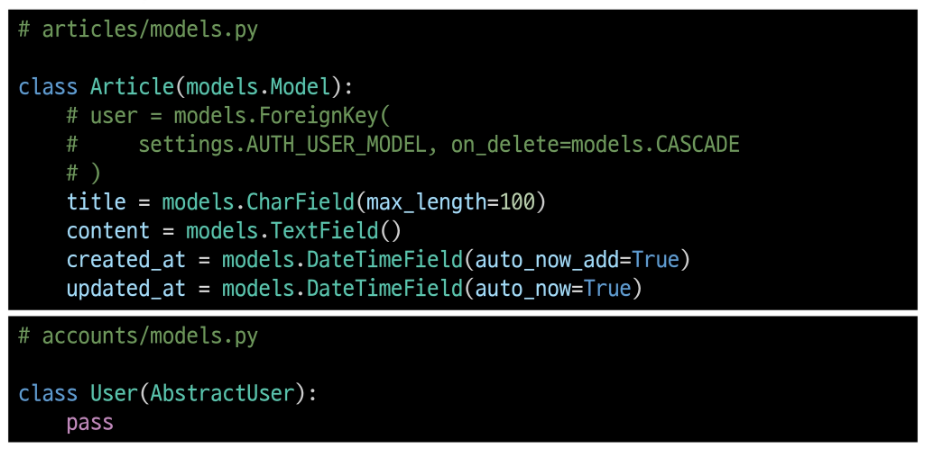
- URL 확인

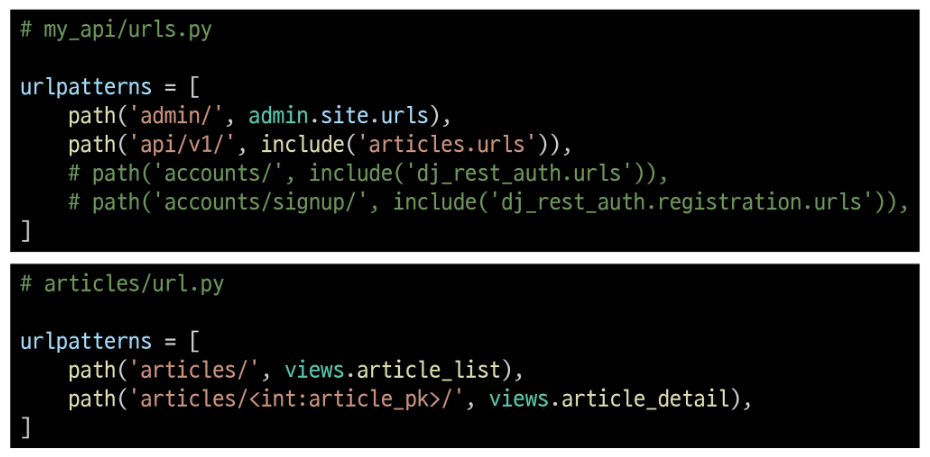

- Serializers 확인

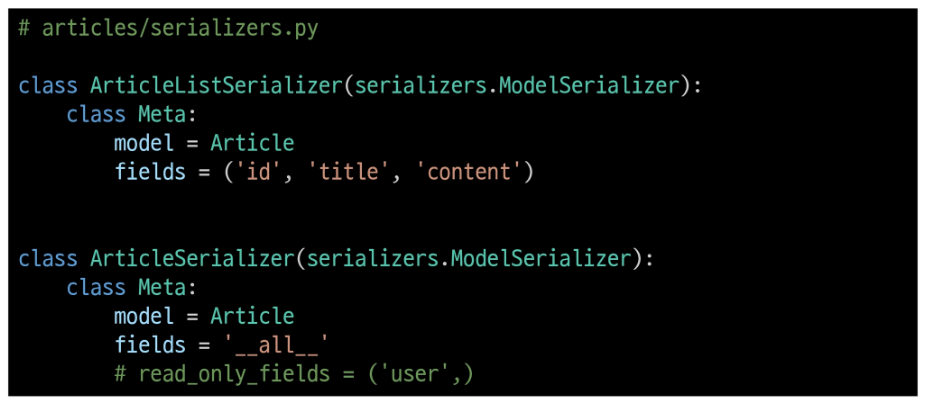

- views.py의 import 부분 확인

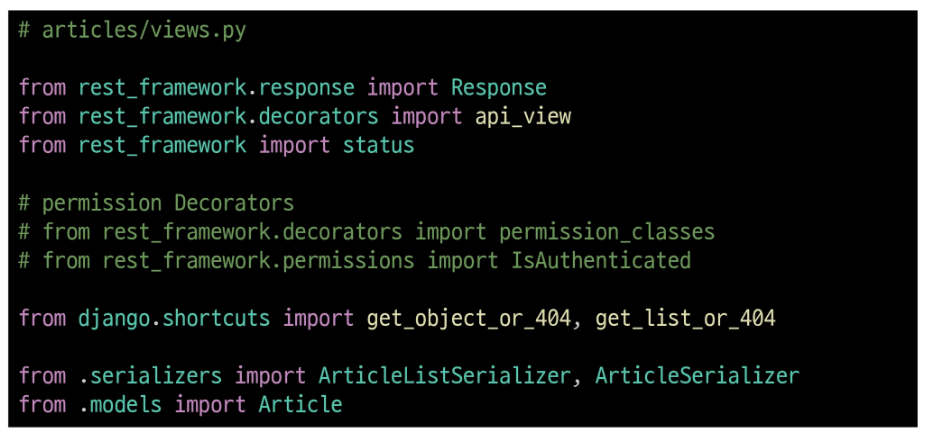

- View 함수 확인

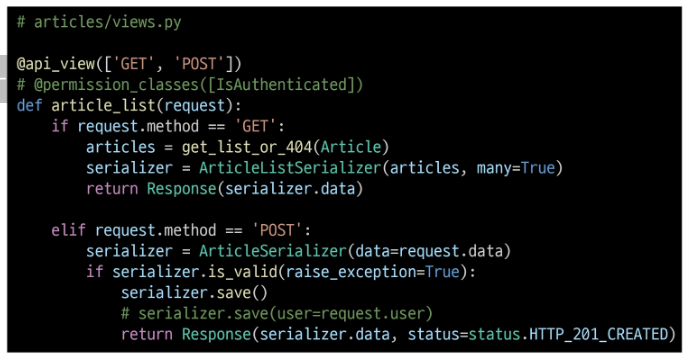

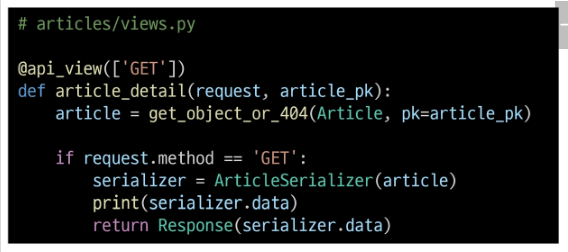

- settings.py 확인

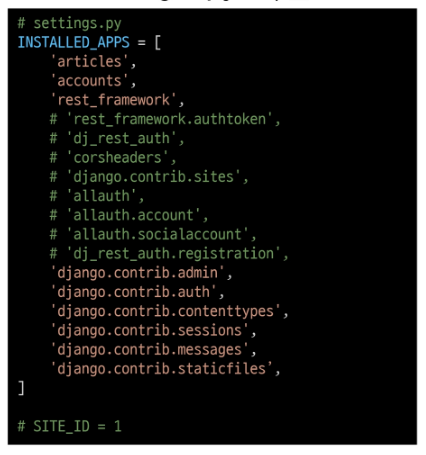

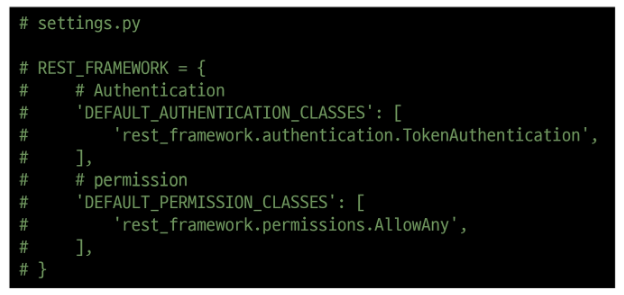

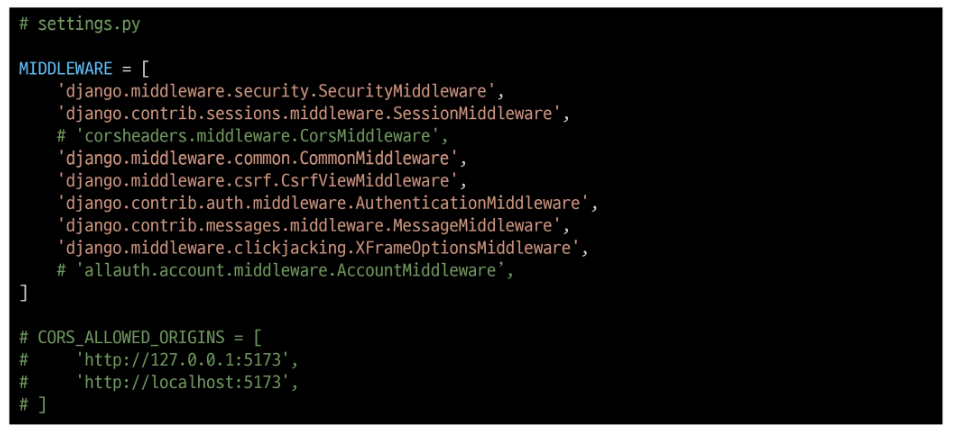

- Fixtures 확인

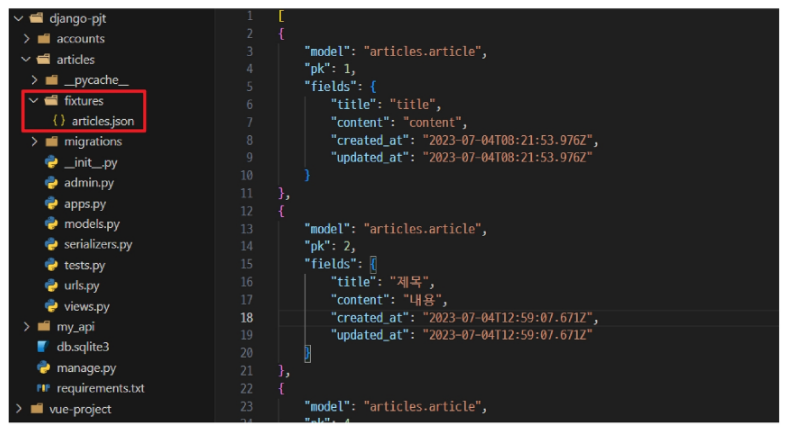

- 가상 환경 생성 및 활성화

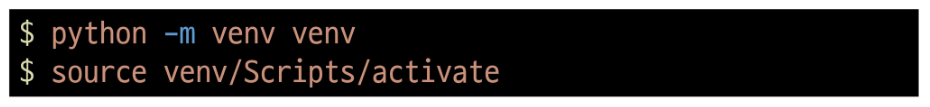

- 패키지 설치

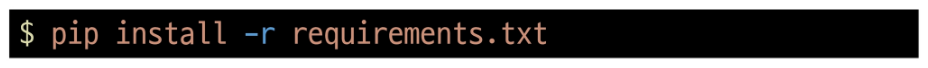

- Fixtures 데이터 로드

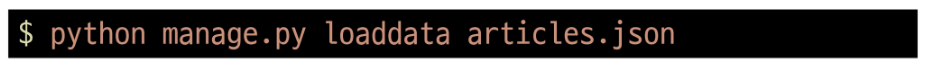

- Django 서버 실행 후, 전체 게시글 조회 요청
    - http://127.0.0.1:8000/api/v1/articles/

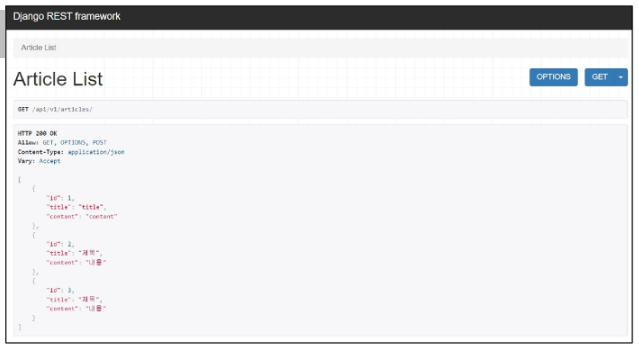

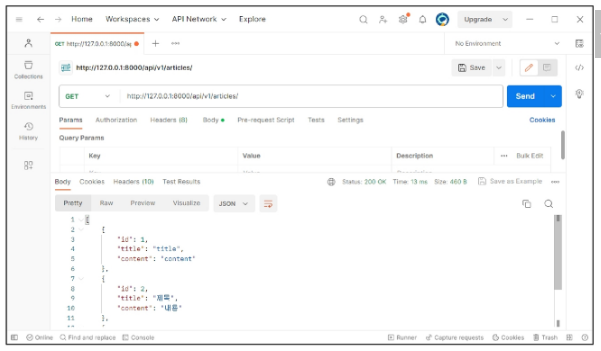

### Vue 프로젝트 안내

#### Vue 프로젝트 안내
- 스켈레톤 프로젝트 vue-pjt 제공 

- Vite를 사용해 Pinia 및 Vue Router가 추가 되어있음 
- pinia-plugin-persistedstate가 설치 및 등록 되어있음 
- Vue 프로젝트는 “직접 코드를 작성"하며 진행
- 컴포넌트 구조

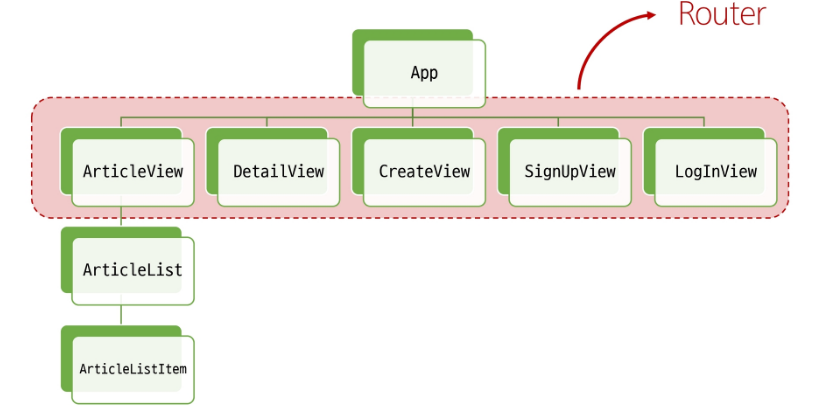

- 프로젝트 구조

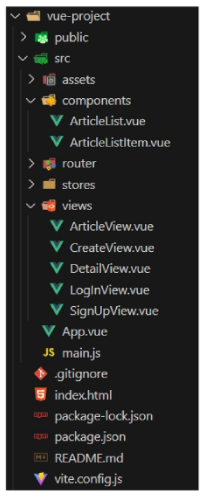

#### Skeleton code 살펴보기
- App 컴포넌트

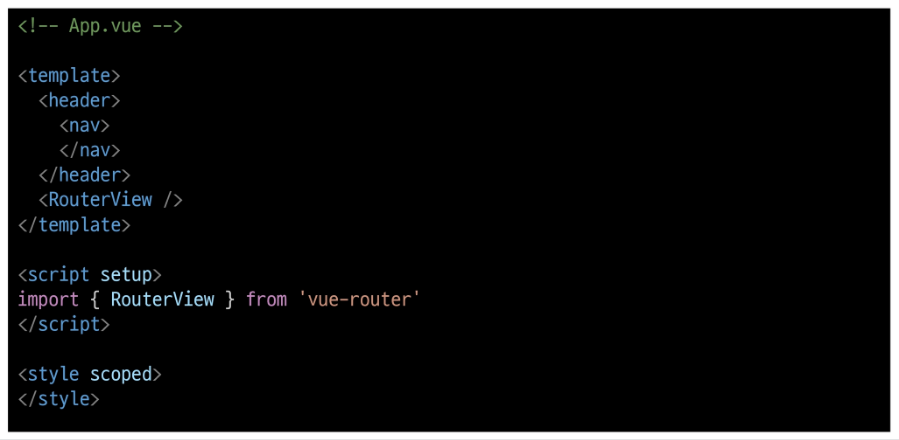

- route에 등록된 컴포넌트 (Article, Create, Detail, LogIn, SignUp)

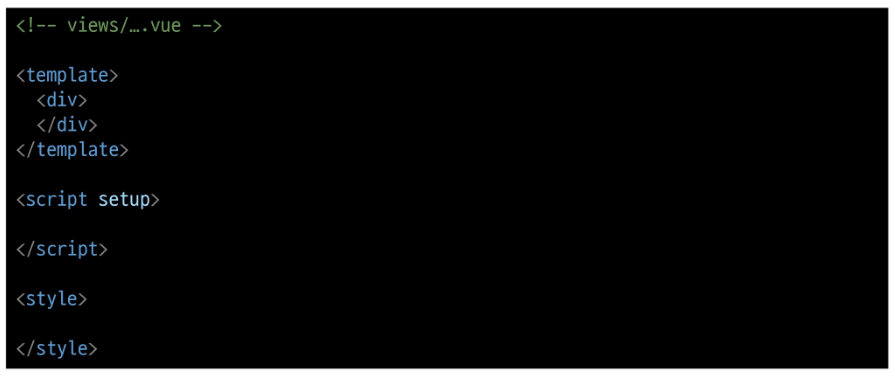

- ArticleList 컴포넌트

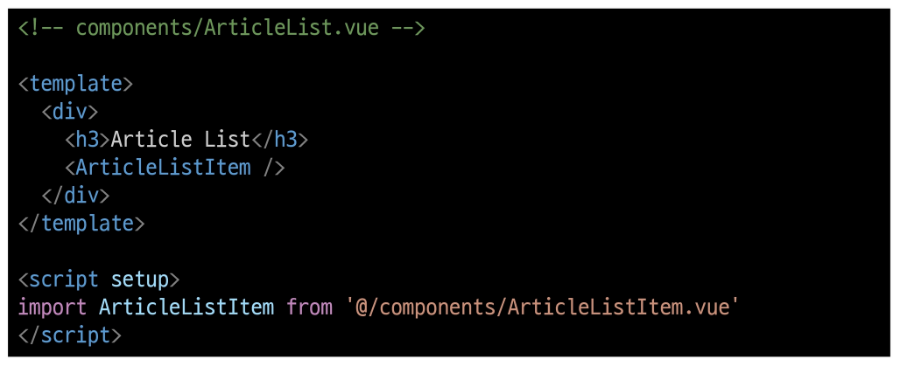

- ArticleListItem 컴포넌트

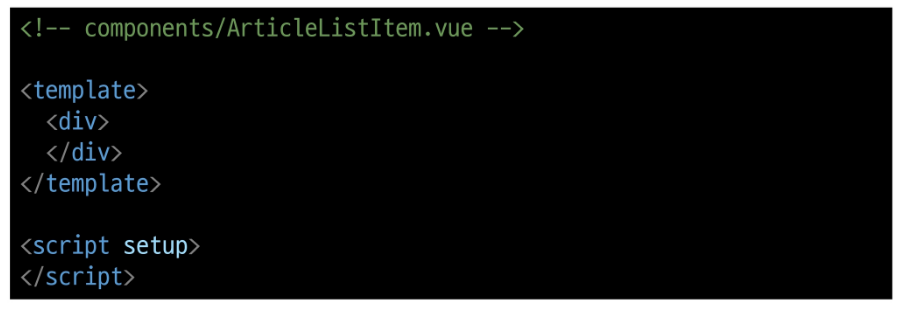

- routes 현황

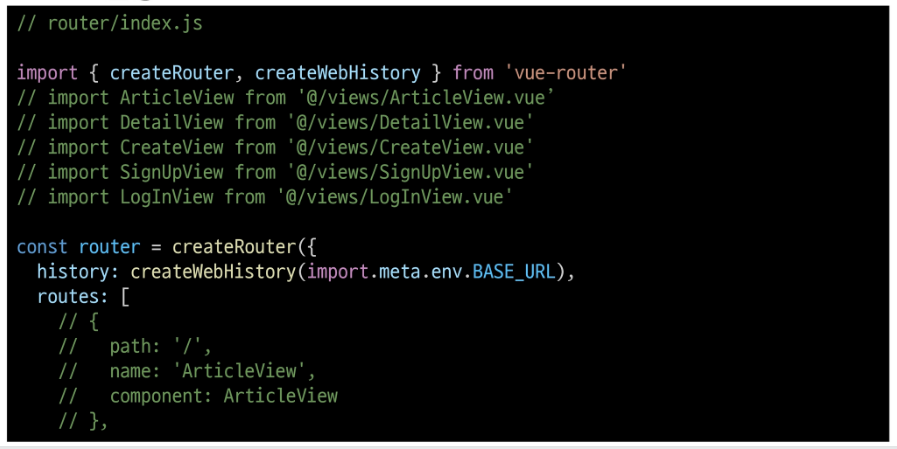

- store 현황

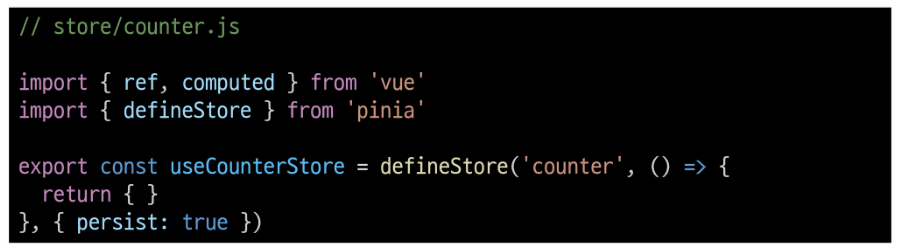

- main.js 현황

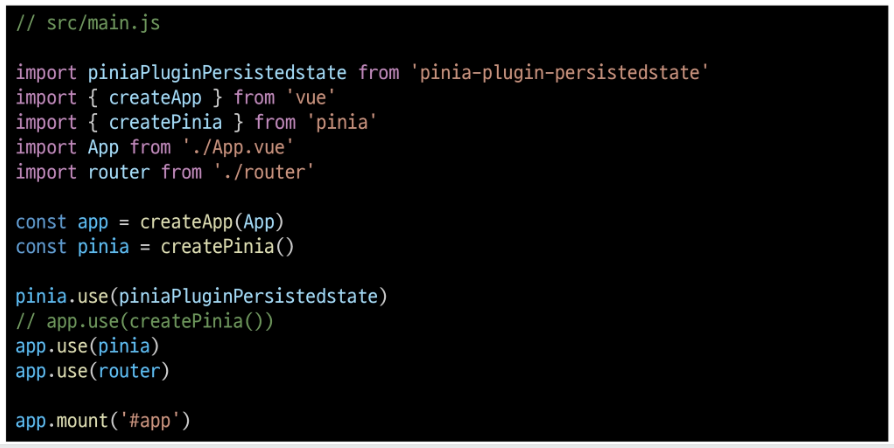

- 패키지 설치

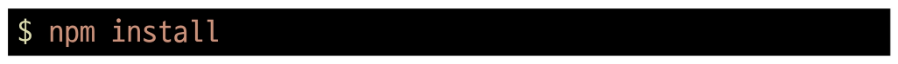

- 서버 실행

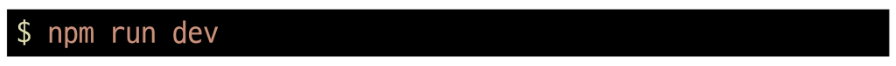

## 메인 페이지 구현

### 시작하기 전에.. 
- 무결점의 프로젝트를 만드는 것이 아님 

- frontend 프레임워크와 backend 프레임워크 간의 요청과 응답, 그 과정에서 등장하는 새로운 개념과 문제를 해결하면서 하나의 웹 애플리케이션 서비스를 구현하는 과정에 집중할 것

### 게시글 목록 출력

#### 개요
- ArticleView 컴포넌트에 ArticleList 컴포넌트와 ArticleListItem 컴포넌트 등록 및 출력하기

- ArticleList와 ArticleListItem은 각각 게시글 출력을 담당

#### 게시글 목록 출력
- ArticleView의 route 관련 코드 주석 해제

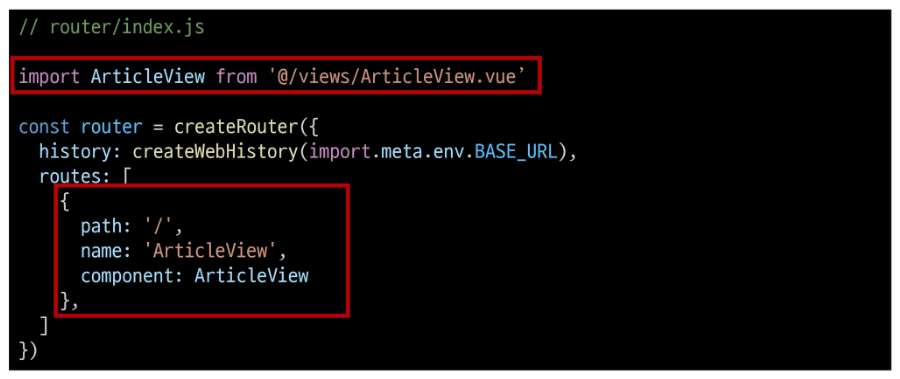

- App 컴포넌트에 ArticleView 컴포넌트로 이동하는 RouterLink 작성

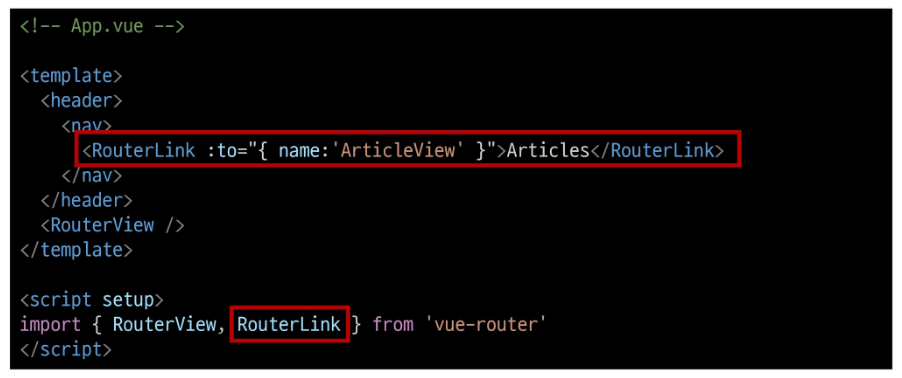

- ArticleView 컴포넌트에 ArticleList 컴포넌트 등록

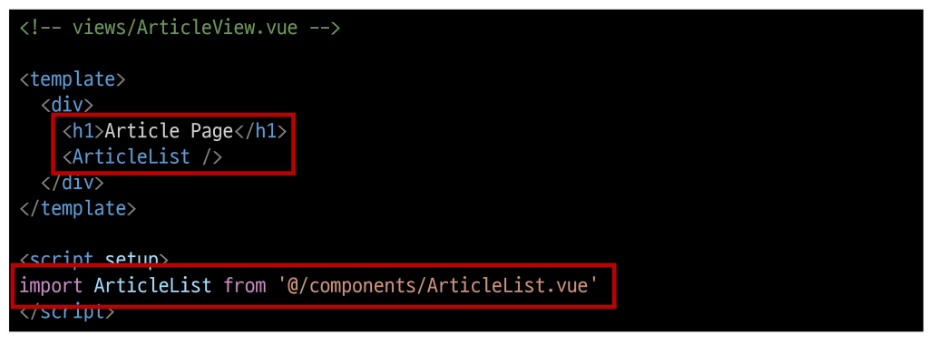

- store에 임시 데이터 articles 배열 작성하기

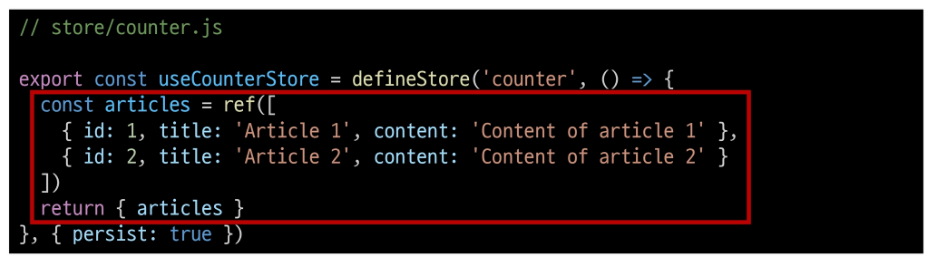

- ArticleList 컴포넌트에서 게시글 목록 출력 

- store의 articles 데이터 참조 
- v-for를 활용하여 하위 컴포넌트에서 사용할 article 단일 객체 정보를 props로 전달
  
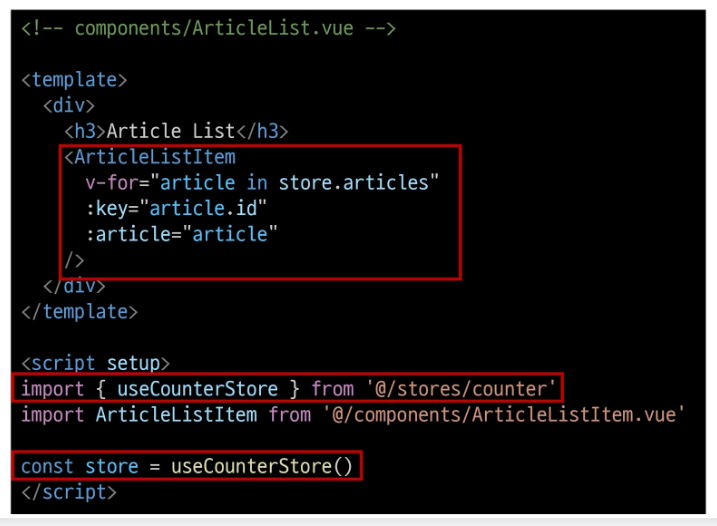

- ArticleListItem 컴포넌트는 내려 받은 props를 정의 후 출력

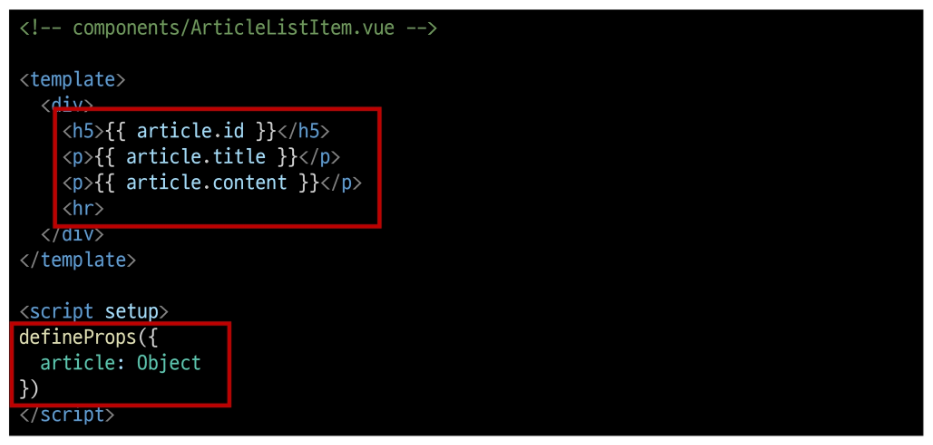

- 메인 페이지에서 게시글 목록 출력 확인

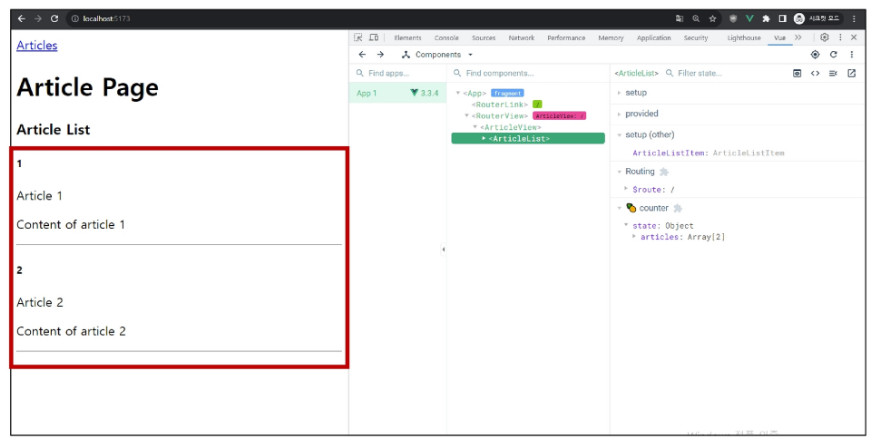

### DRF와의 요청과 응답

#### DRF로 부터 응답 데이터 받기 
이제는 임시 데이터가 아닌 DRF 서버에 요청하여 데이터를 응답 받아 store에 저장 후 출력하기

#### DRF와의 요청과 응답 
- DRF 서버로의 AJAX 요청을 위한 axios 설치 및 관련 코드 작성

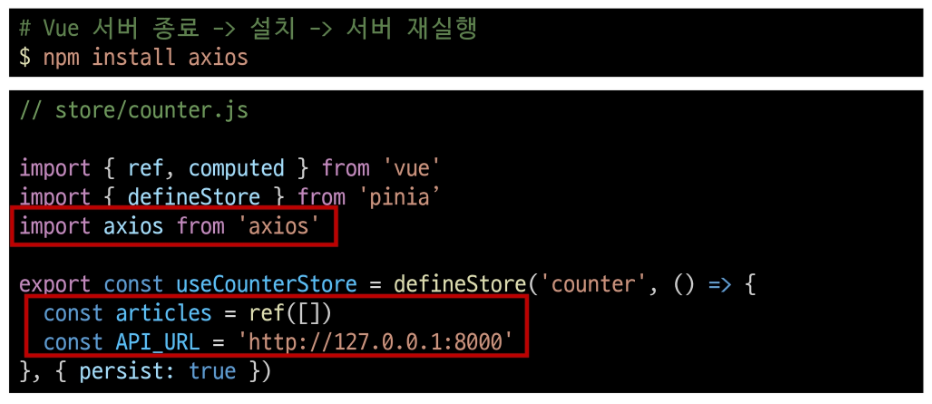
- DRF 서버로 요청을 보내고 응답 데이터를 처리하는 getArticles 함수 작성

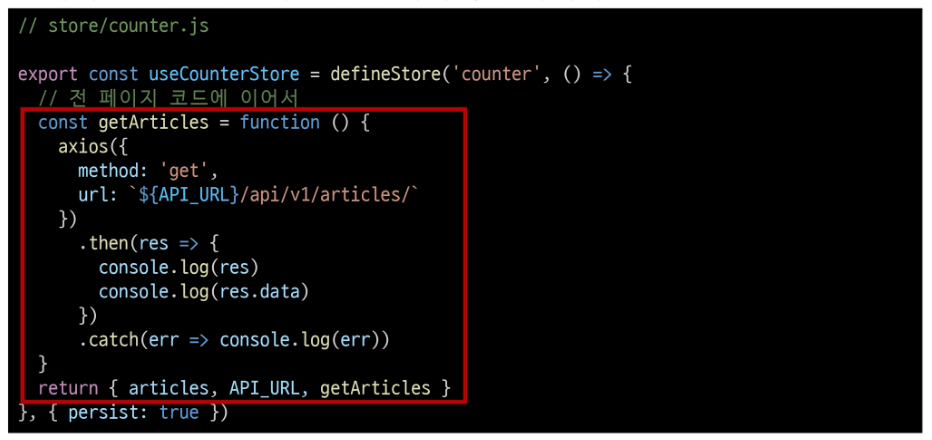
- ArticleView 컴포넌트가 마운트 될 때 getArticles 함수가 실행되도록 함 

- > 해당 컴포넌트가 렌더링 될 때 항상 최신 게시글 목록을 불러오기 위함

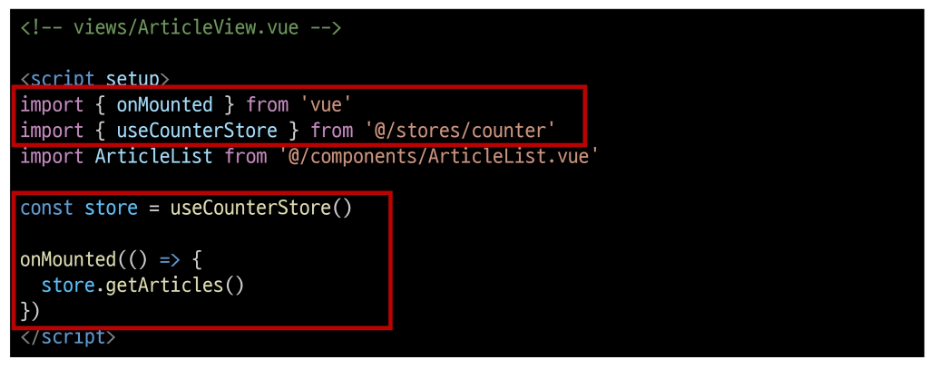
- Vue와 DRF 서버를 모두 실행한 후 응답 데이터 확인 
- > 에러 발생

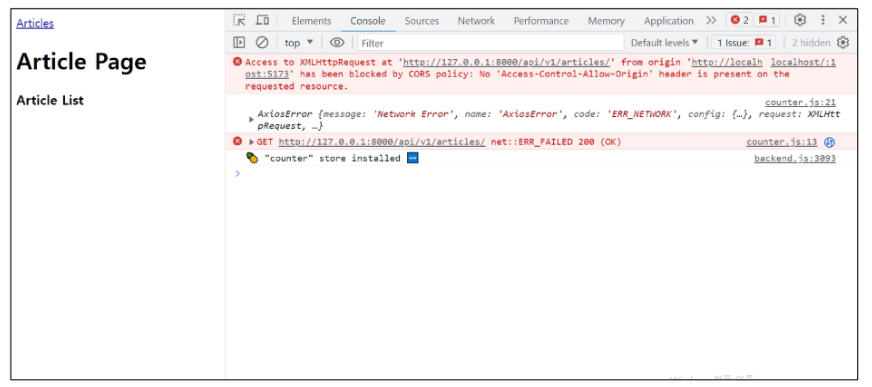
- 그런데 DRF 서버 측에서는 문제 없이 응답했음 (200 OK) 
- > 서버는 응답했으나 브라우저 측에서 거절한 것

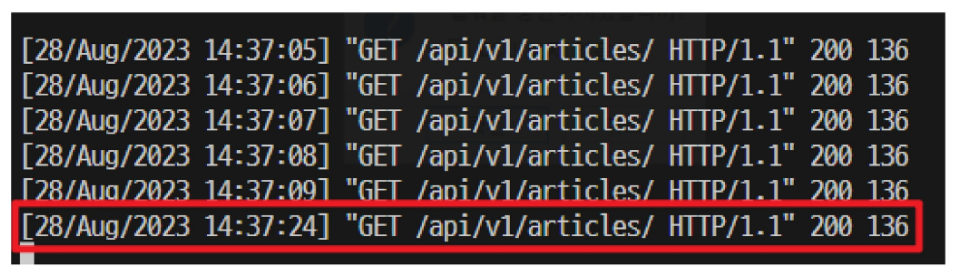
- 브라우저가 거절한 이유 
- > 'localhost:5173'에서 '127.0.0.1:8000/api/v1/articles/'의 XMLHttpRequest에 대한 접근이 `CORS policy`에 의해 차단되었다.

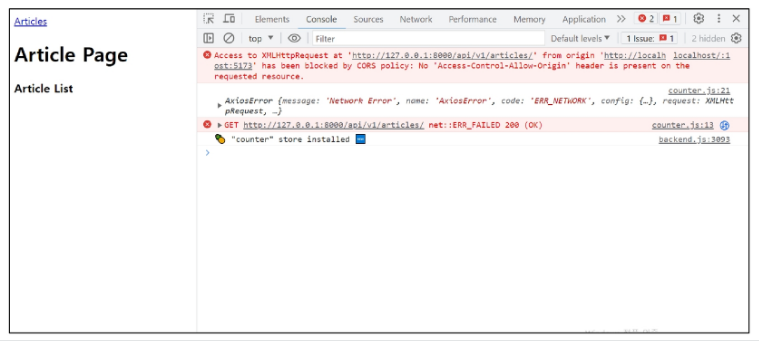

## CORS Policy

### CORS Policy

#### SOP 
##### (Same-origin policy) 
동일 출처 정책

#### SOP 
- 어떤 출처(Origin)에서 불러온 문서나 스크립트가 다른 출처에서 가져온 리소스와 상호 작용하는 것을 제한하는 보안 방식 

- > “다른 곳에서 가져온 자료는 일단 막는다." 
- > 웹 애플리케이션의 도메인이 다른 도메인의 리소스에 접근하는 것을 제어하여 사용자의 개인 정보와 데이터의 보안을 보호하고, 잠재적인 보안 위협을 방지 
- > 잠재적으로 해로울 수 있는 문서를 분리함으로써 공격받을 수 있는 경로를 줄임 

- https://developer.mozilla.org/en-US/docs/Web/Security/Same-origin_policy

#### Origin (출처)
- URL의 Protocol, Host, Port를 모두 포함하여 “출처”라고 부름 

- Same Origin 예시 
    - 아래 `세 영역`이 `일치`하는 경우에만 `동일 출처(Same-origin)`로 인정

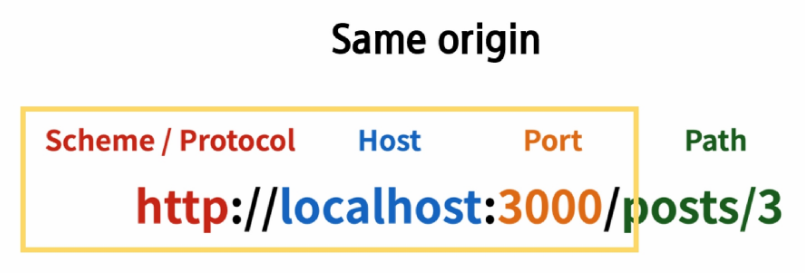

- http://localhost:3000/articles/3/을 기준으로 동일 출처 여부를 비교

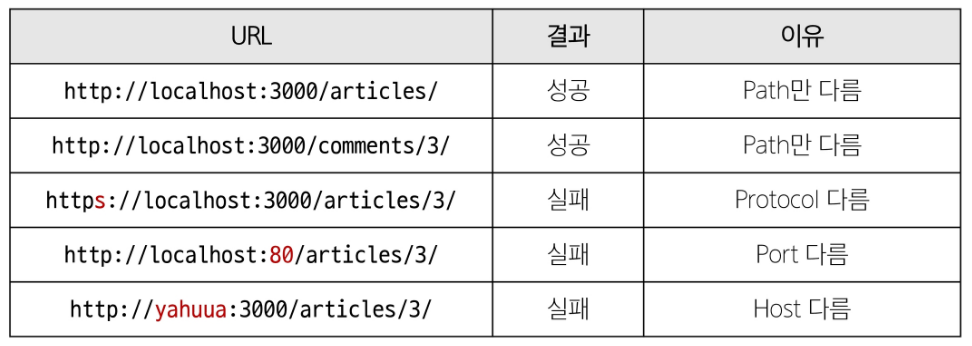

#### CORS policy의 등장 
- 기본적으로 웹 브라우저는 같은 출처에서만 요청하는 것을 허용하며, 다른 출처로의 요청은 보안상의 이유로 차단됨 
    - SOP에 의해 다른 출처의 리소스와 상호작용 하는 것이 기본적으로 제한되기 때문

- 하지만 현대 웹 애플리케이션은 다양한 출처로부터 리소스를 요청하는 경우가 많기 때문에 CORS 정책이 필요하게 되었음 
- > `CORS`는 웹 서버가 리소스에 대한 서로 다른 출처 간 접근을 허용하도록 선택할 수 있는 기능을 제공

#### CORS 
##### (Cross-Origin Resource Sharing) 
교차 출처 리소스 공유

- 특정 출처에서 실행 중인 웹 애플리케이션이 `다른 출처의 자원에 접근할 수 있는 권한을 부여`하도록 브라우저에 알려주는 체제

- > 만약 다른 출처의 리소스를 가져오기 위해서는 이를 제공하는 서버가 브라우저에게 다른 출처지만 접근해도 된다는 사실을 알려야 함 
- > "CORS policy (교차 출처 리소스 공유 정책)”

#### CORS Policy 
##### (Cross-Origin Resource Sharing Policy) 
교차 출처 리소스 공유 정책

- 다른 출처에서 온 리소스를 공유하는 것에 대한 정책

- 서버에서 설정되며, 브라우저가 해당 정책을 확인하여 요청이 허용되는지 여부를 결정 
- > 다른 출처의 리소스를 불러오려면 그 다른 출처에서 올바른 CORS header를 포함한 응답을 반환해야 함
- https://developer.mozilla.org/ko/docs/Web/HTTP/CORS

#### CORS 적용 방법
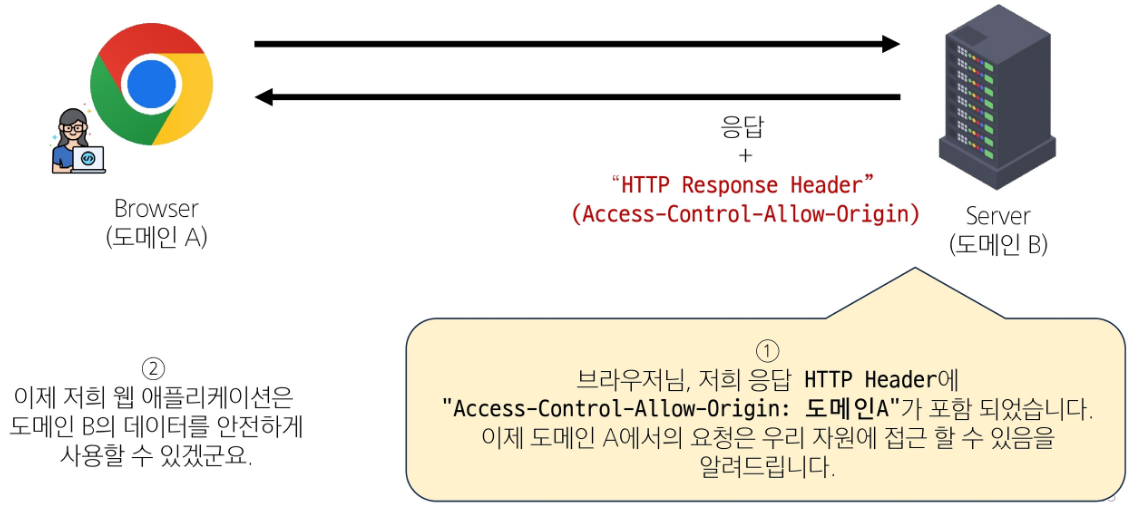

#### CORS policy 정리 
- 웹 애플리케이션이 다른 도메인에 있는 리소스에 안전하게 접근할 수 있도록 허용 또는 차단하는 보안 메커니즘 
- 서버가 약속된 CORS Header를 포함하여 응답한다면 브라우저는 해당 요청을 허용 

- > 서버에서 CORS Header를 만들어야 한다.
- https://developer.mozilla.org/ko/docs/Web/HTTP/CORS

### CORS Headers 설정

#### CORS Headers 설정하기 
- Django에서는 django-cors-headers 라이브러리 활용 

- > 손쉽게 응답 객체에 CORS header를 추가해주는 라이브러리
- https://github.com/adamchainz/django-cors-headers

#### django-cors-headers 사용하기
- 설치 (requirements.txt로 인해 사전에 설치되어 있음)

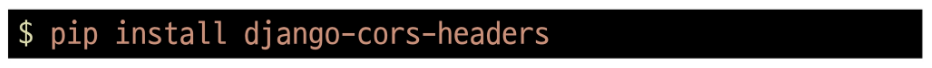

- 관련 코드 주석 해제

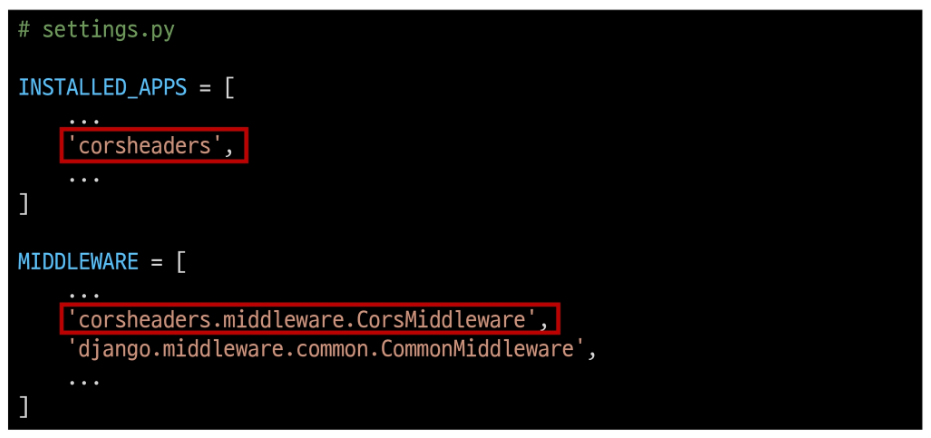

- CORS를 허용할 Vue 프로젝트의 Domain 등록

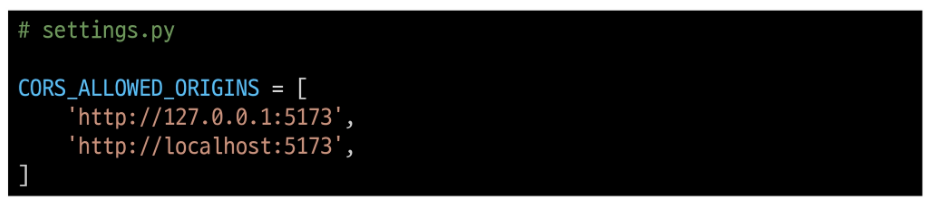

#### CORS 처리 결과 
- 메인 페이지에서 DRF 응답 데이터 재확인

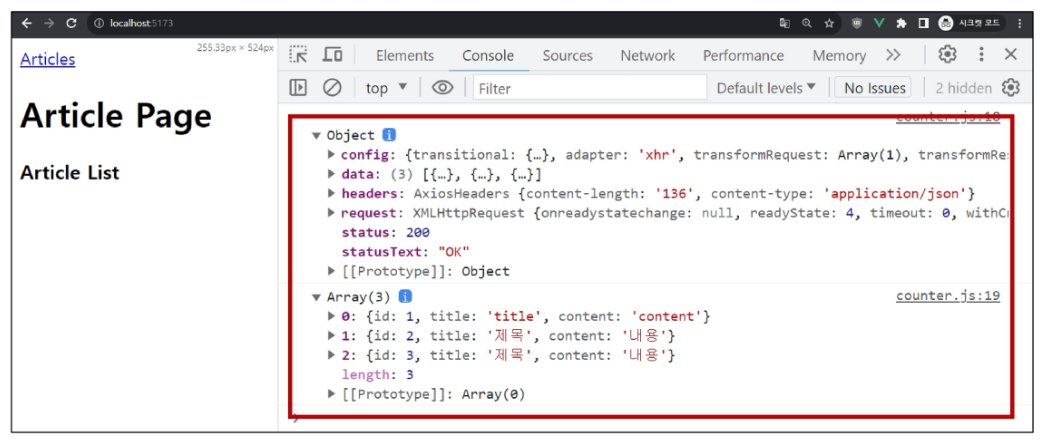

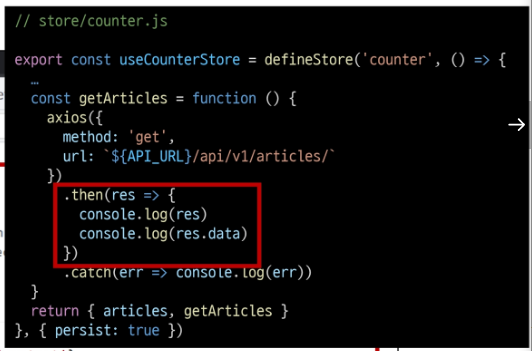

- 응답 객체에서 'Access-Control-Allow-Origin' Header 확인 
    - 개발자도구 - Network - Fetch/XHR

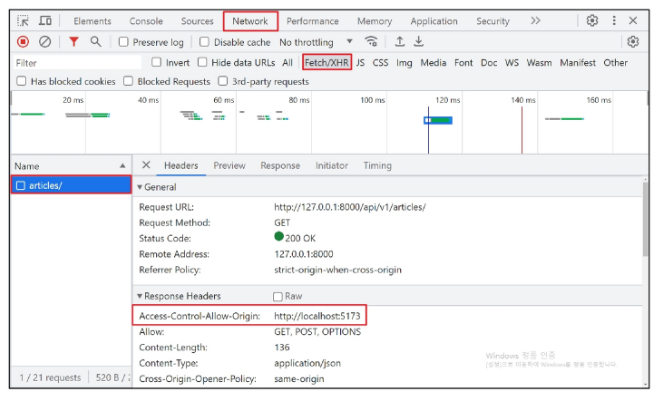

## Article CR 구현

### 전체 게시글 조회

#### 전체 게시글 목록 저장 및 출력
- 응답 받은 데이터에서 각 게시글의 데이터 구성 확인 (id, title, content)

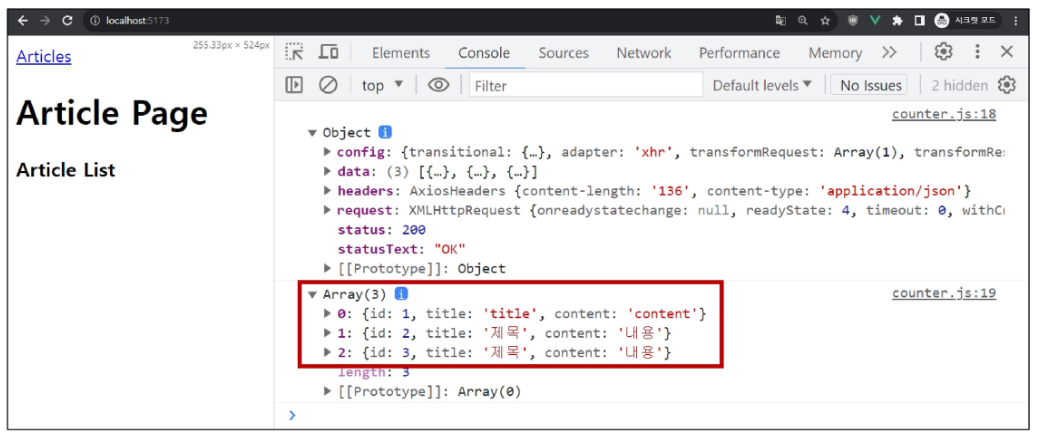

- store에 게시글 목록 데이터 저장

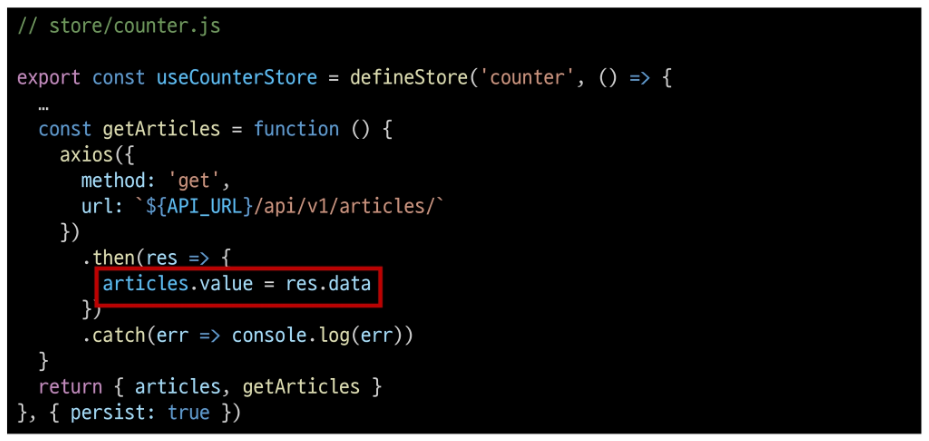

- store에 저장된 게시글 목록 출력 확인
    - pinia-plugin-persistedstate에 의해 브라우저 Local Storage에 저장됨

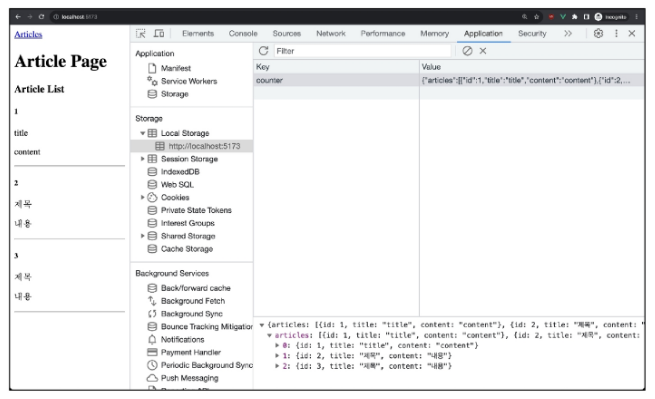

### 단일 게시글 조회

#### 단일 게시글 데이터 출력 
- DetailVue 관련 route 주석 해제

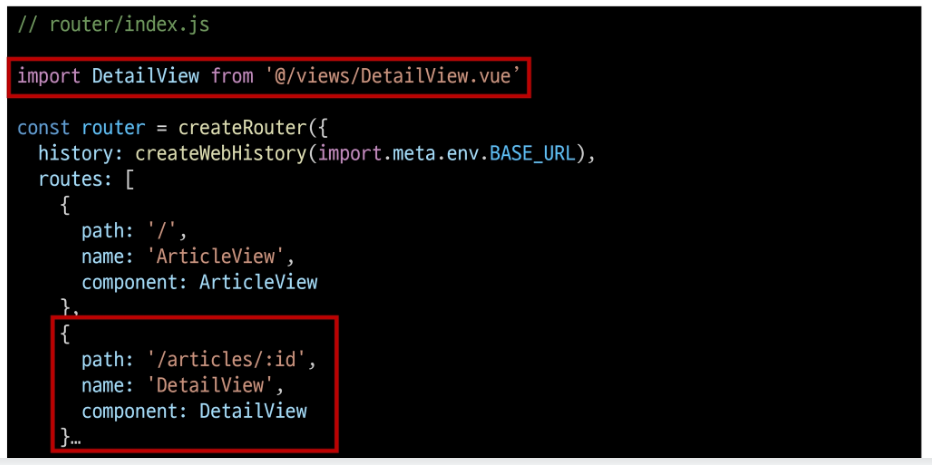

- ArticleListItem에 DetailView 컴포넌트로 가기 위한 RouterLink 작성

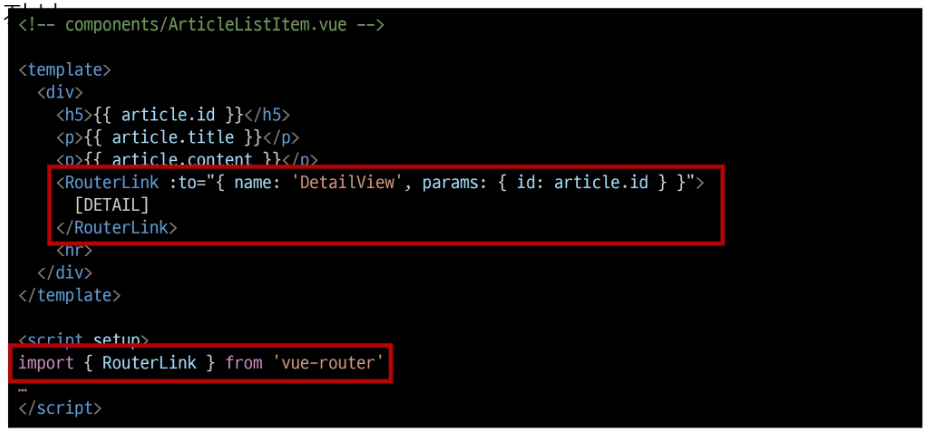

- DetailView가 마운트 될 때 특정 게시글을 조회하는 AJAX 요청 진행

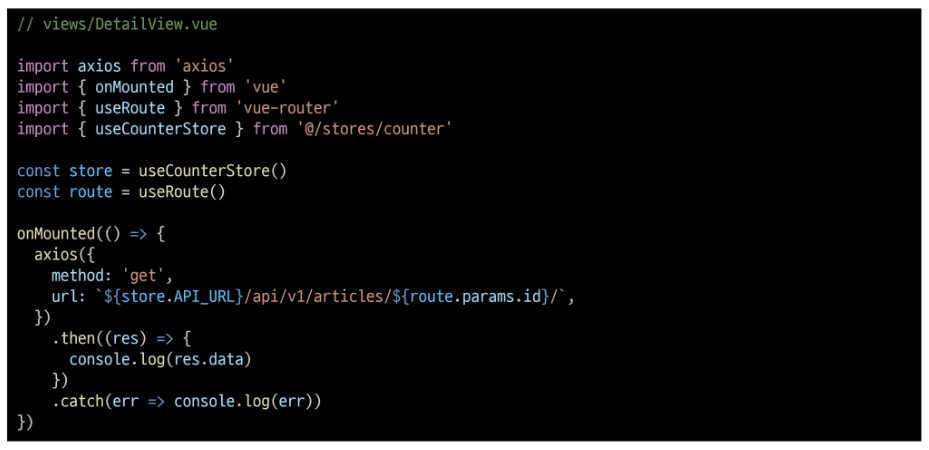

- 응답 데이터 확인 
    - http://localhost:5173/articles/1/

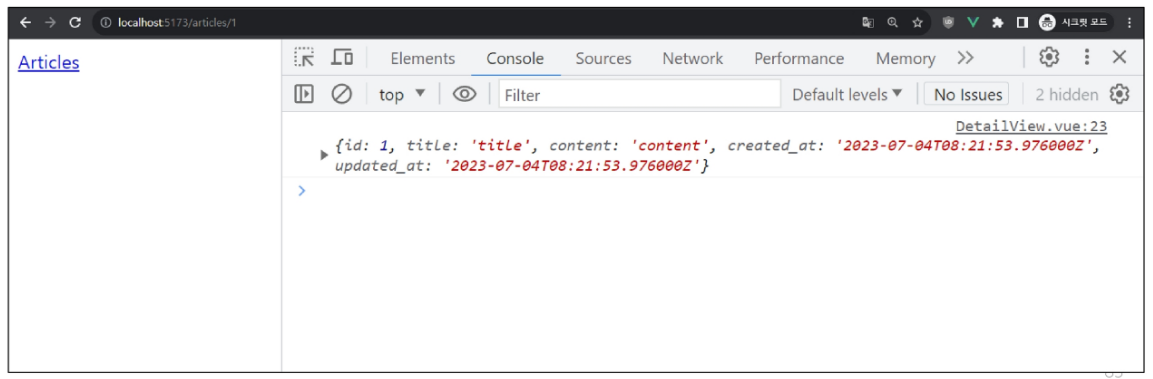

- 응답 데이터 저장 후 출력

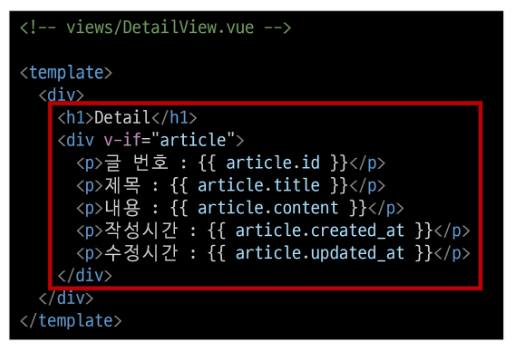

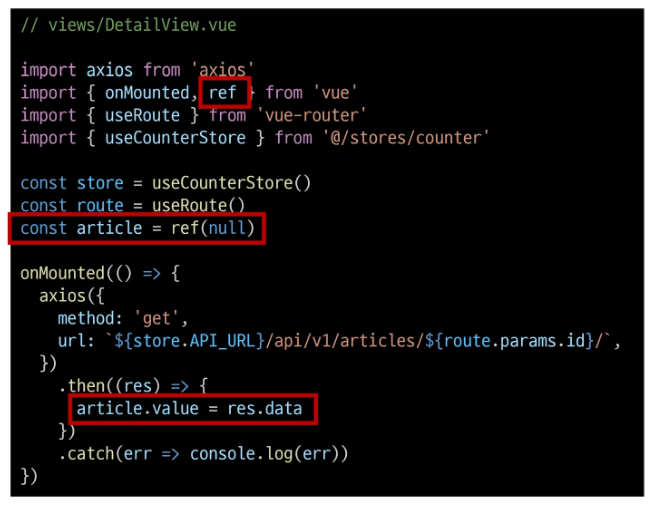

- 결과 확인

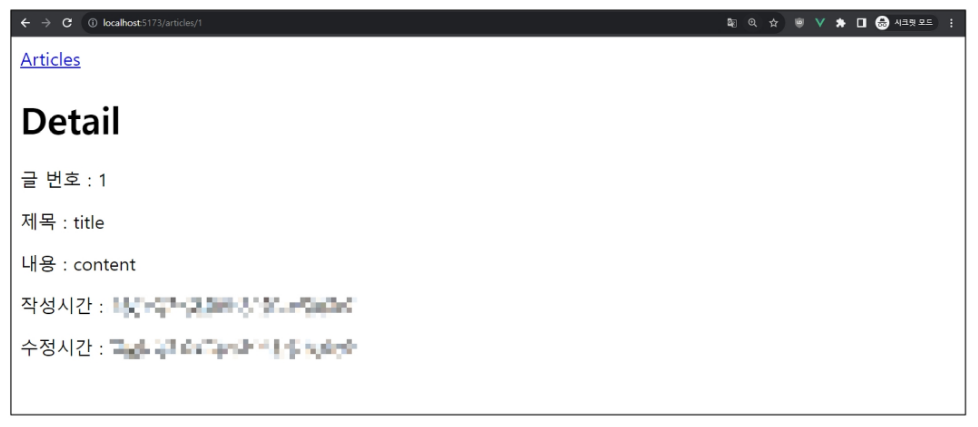

### 게시글 작성

#### 게시글 작성
- CreateView 관련 route 주석 해제

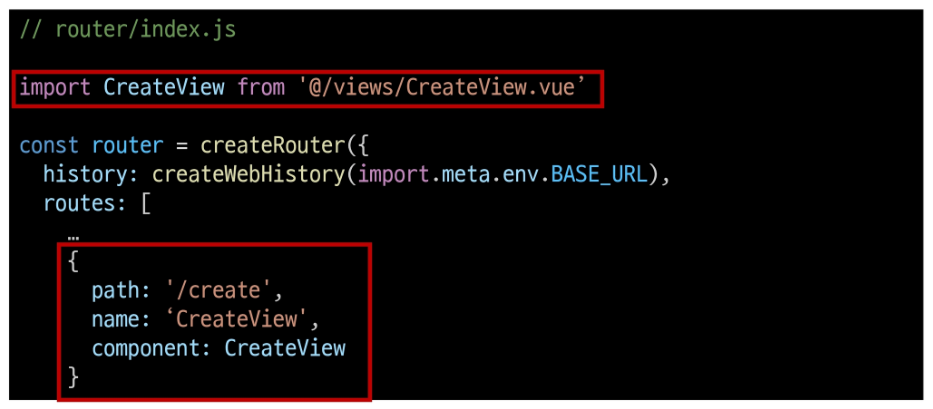

- ArticleView에 CreateView 컴포넌트로 가기 위한 RouterLink 작성

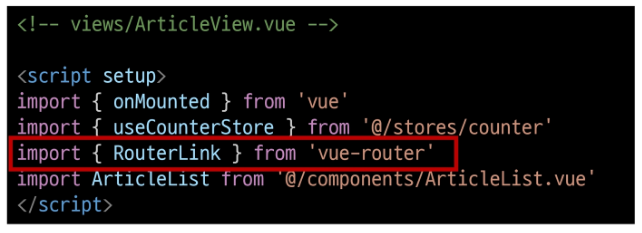

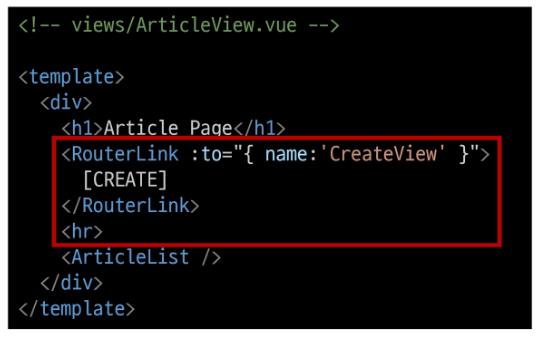

- v-model을 사용해 사용자 입력 데이터를 양방향 바인딩 

- v-model의 trim 수식어를 사용해 사용자 입력 데이터의 공백을 제거

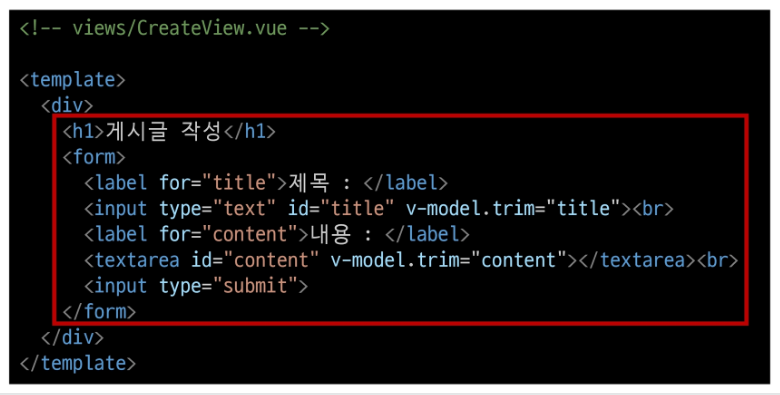

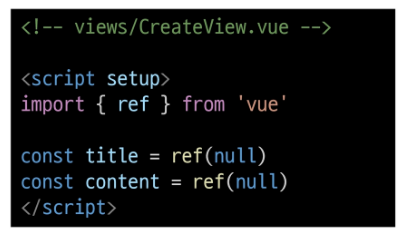

- 양방향 바인딩 데이터 입력 확인

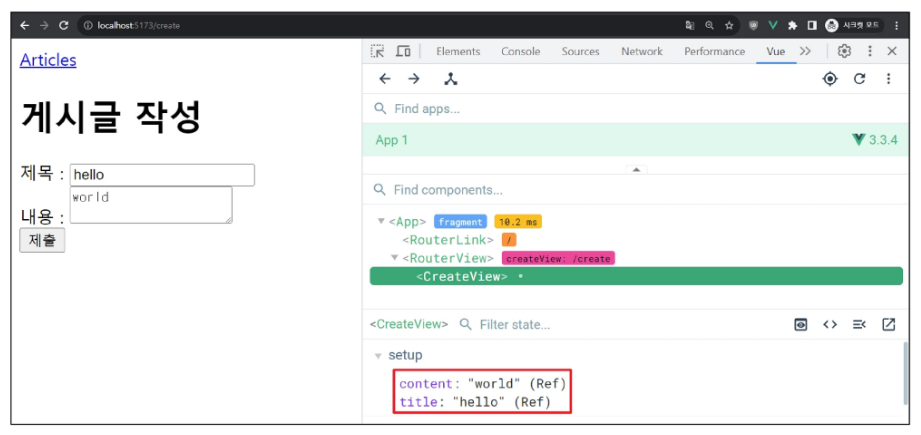

- 게시글 생성 요청을 담당하는 createArticle 함수 작성 

- 게시글 생성이 성공한다면 ArticleView 컴포넌트로 이동

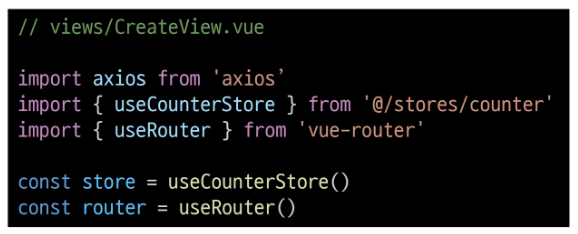

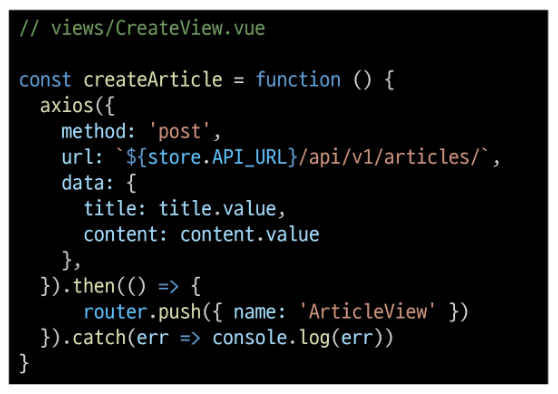

- submit 이벤트가 발생하면 createArticle 함수를 호출 

- v-on의 prevent 수식어를 사용해 submit 이벤트의 기본 동작 취소

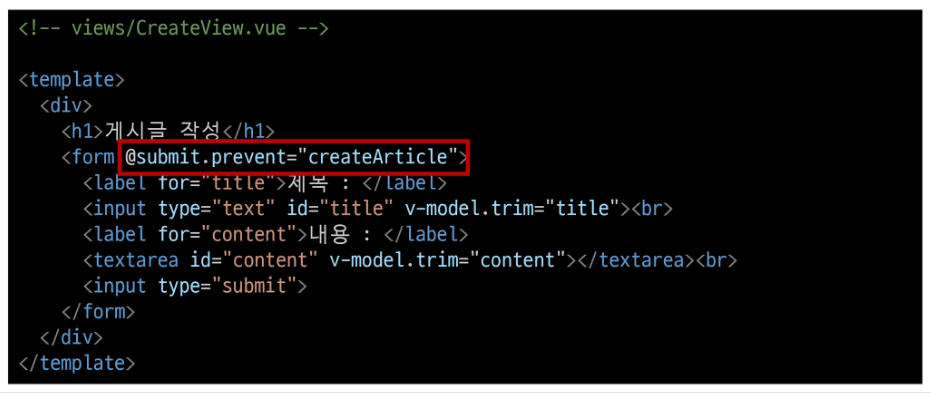

- 게시글 생성 결과 확인

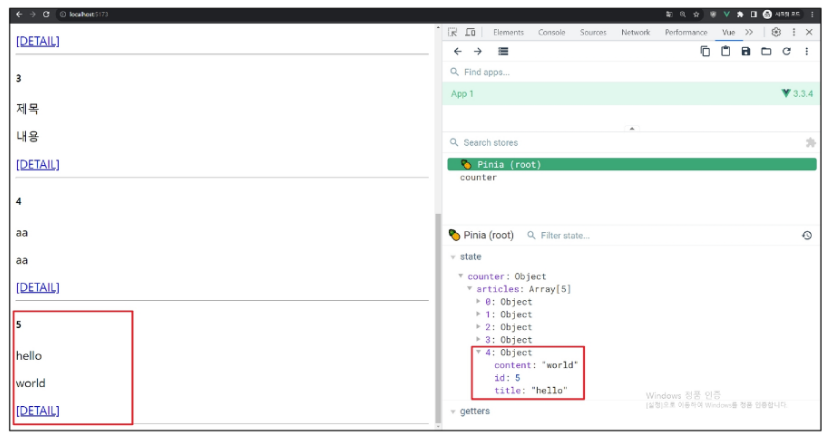

- 서버 측 DB 확인

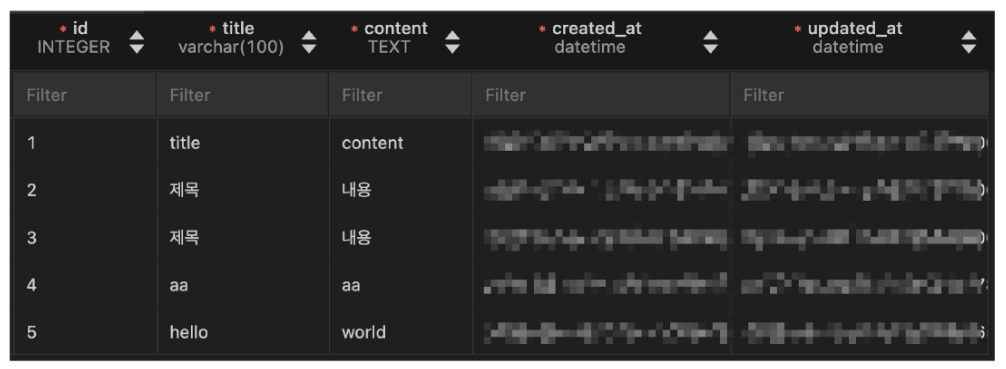